In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras import backend as K
from keras.layers import Dense, Flatten, Input, MaxPooling2D, Activation, ZeroPadding2D, merge, Dropout, Conv2D

/home/chutz/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
pic = cv2.imread('./Downloads/ILSVRC2012_val_00000003.JPEG')
#pic = img_resize(pic, 224)

In [3]:
#set your own model
model = Sequential()
#model.add(Input(shape=pic.shape))
model.add(Conv2D(filters=4, kernel_size=(7,7), strides=1, input_shape=pic.shape))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 369, 494, 4)       592       
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#use this function if you want to resize your pic into a fixed shape
#if not, just skip
def img_resize(img, img_size, use_datagen=False):
    # resize the image to the specific size
    if (img.shape[0] > img.shape[1]):
        scale = float(img_size) / float(img.shape[1])
        img = np.array(cv2.resize(np.array(img), (
        int(img.shape[0] * scale + 1), img_size))).astype(np.float32)
    else:
        scale = float(img_size) / float(img.shape[0])
        img = np.array(cv2.resize(np.array(img), (
        img_size, int(img.shape[1] * scale + 1)))).astype(np.float32)
    # crop the proper size and scale to [-1, 1]
    img = (img[(img.shape[0] - img_size) // 2:(img.shape[0] - img_size) // 2 + img_size,
            (img.shape[1] - img_size) // 2:(img.shape[1] - img_size) // 2 + img_size,
            :]-127)/255
    if use_datagen:
        rotation = cv2.getRotationMatrix2D((img_size/2, img_size/2), 30, 1)
        img = cv2.warpAffine(img, rotation, (img_size, img_size))
    return img

In [4]:
pic_batch = np.expand_dims(pic, axis=0)

In [5]:
#change output layer number to the layer you want to visualize
layer_1 = K.function([model.layers[0].input], [model.layers[0].output])
f1 = layer_1([pic_batch])[0]

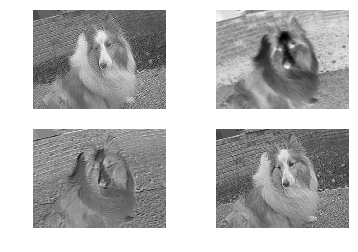

In [6]:
#number of your filters
for _ in range(4):
    show_img = f1[:, :, :, _]
    show_img.shape = [369, 494]
    plt.subplot(2, 2, _+1)
    plt.imshow(show_img, cmap='gray')
    plt.axis('off')
plt.savefig('./Downloads/map3.jpg') #change to your own save path
plt.show()